In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
import time

#import data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

x_train = x_train.reshape(60000, 784)#shape of every image=an array of total pixels
x_test = x_test.reshape(10000, 784)

In [2]:
#activation fuction
def sigmoid(A,derivative):
    if derivative:        
        return sigmoid(A,False)*(1-sigmoid(A,False))
    else:
        return 1 / (1 + exp(-A))

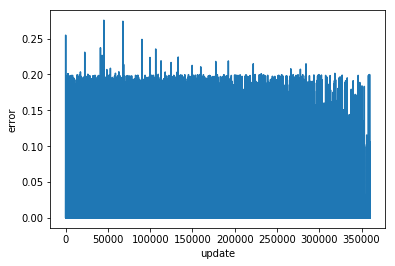

93.67795896530151 seconds to train
Accuracy : 0.953700
0.44832634925842285 seconds to test


In [3]:
#weight initialization
numOfHiddenNeurons = 64
w1 = np.random.uniform(-1, 1, (784,numOfHiddenNeurons))
b1 = np.random.uniform(-1, 1, (1,numOfHiddenNeurons))
w2 = np.random.uniform(-1, 1, (numOfHiddenNeurons,numOfHiddenNeurons))
b2 = np.random.uniform(-1, 1, (1,numOfHiddenNeurons))
w3 = np.random.uniform(-1, 1, (numOfHiddenNeurons,10))
b3 = np.random.uniform(-1, 1, (1,10))

#train
epochs = 6
learningRate = 0.1
targets = np.eye(10)
errors = np.zeros(60000*epochs)

start_time = time.time()
for i in range (0,epochs): 
    for j in range(0,60000):
        #forward pass
        z1 = np.matmul(x_train[j,:],w1) - b1
        a1 = sigmoid(z1,False)
        
        z2 = np.matmul(a1,w2) - b2
        a2 = sigmoid(z2,False)
        
        z3 = np.matmul(a2,w3) - b3
        a3 = sigmoid(z3,False)
        
        #error 
        error = (np.square(a3 - targets[:,y_train[j]])).mean() #mean square error
        errors[j*(i+1)] = error #save error
        
        #backpropagation
        d3 = np.multiply(sigmoid(z3,True),(a3-targets[:,y_train[j]]))
        dw3 = np.matmul(np.transpose(a2),d3)
        
        d2 = np.multiply(sigmoid(z2,True),(np.matmul(d3,np.transpose(w3))))
        dw2 = np.matmul(np.transpose(a1),d2)
        
        d1 = np.multiply(sigmoid(z1,True),(np.matmul(d2,np.transpose(w2))))
        dw1 = np.matmul(x_train[j,:].reshape(784,1),d1)
        
        #update weights
        w3 = w3 - learningRate*dw3
        w2 = w2 - learningRate*dw2
        w1 = w1 - learningRate*dw1
        b3 = b3 - learningRate*d3
        b2 = b2 - learningRate*d2
        b1 = b1 - learningRate*d1       
        
plt.plot(errors)
plt.ylabel('error')
plt.xlabel('update')
plt.show()

print("%s seconds to train" % (time.time() - start_time))

#test
correct=0
wrongClass = []
correctClass = []
start_time = time.time()
for i in range(10000):
    
    z1 = np.matmul(x_test[i,:],w1) - b1
    a1 = sigmoid(z1,False)
        
    z2 = np.matmul(a1,w2) - b2
    a2 = sigmoid(z2,False)
        
    z3 = np.matmul(a2,w3) - b3
    a3 = sigmoid(z3,False)
    
    if np.argmax(a3) == y_test[i]:
        correct +=1
        correctClass.append(i)
    else:
        wrongClass.append(i)

print("Accuracy : %f" %(correct/10000))
print("%s seconds to test" % (time.time() - start_time))

Some images that we got wrong:


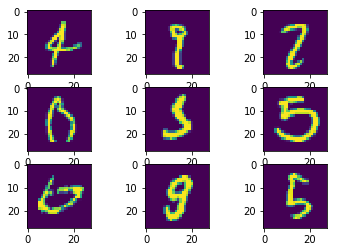

Some images that we got correct:


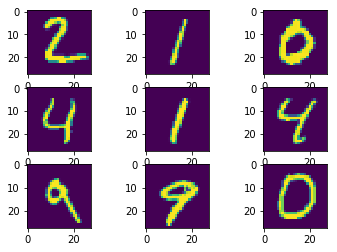

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data() #reload data to plot 

fig=plt.figure()
columns = 3
rows = 3
print("Some images that we got wrong:")
for i in range(1, columns*rows +1):    
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_test[wrongClass[i+10]][:][:])
plt.show()

fig2=plt.figure()
columns = 3
rows = 3
print("Some images that we got correct:")
for i in range(1, columns*rows +1):    
    fig2.add_subplot(rows, columns, i)
    plt.imshow(x_test[correctClass[i]][:][:])
plt.show()